In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Data Exploration:
#Load the dataset and perform exploratory data analysis (EDA).
df = pd.read_csv(r"C:\Users\Dell\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv")
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
#Examine the features, their types, and summary statistics.
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

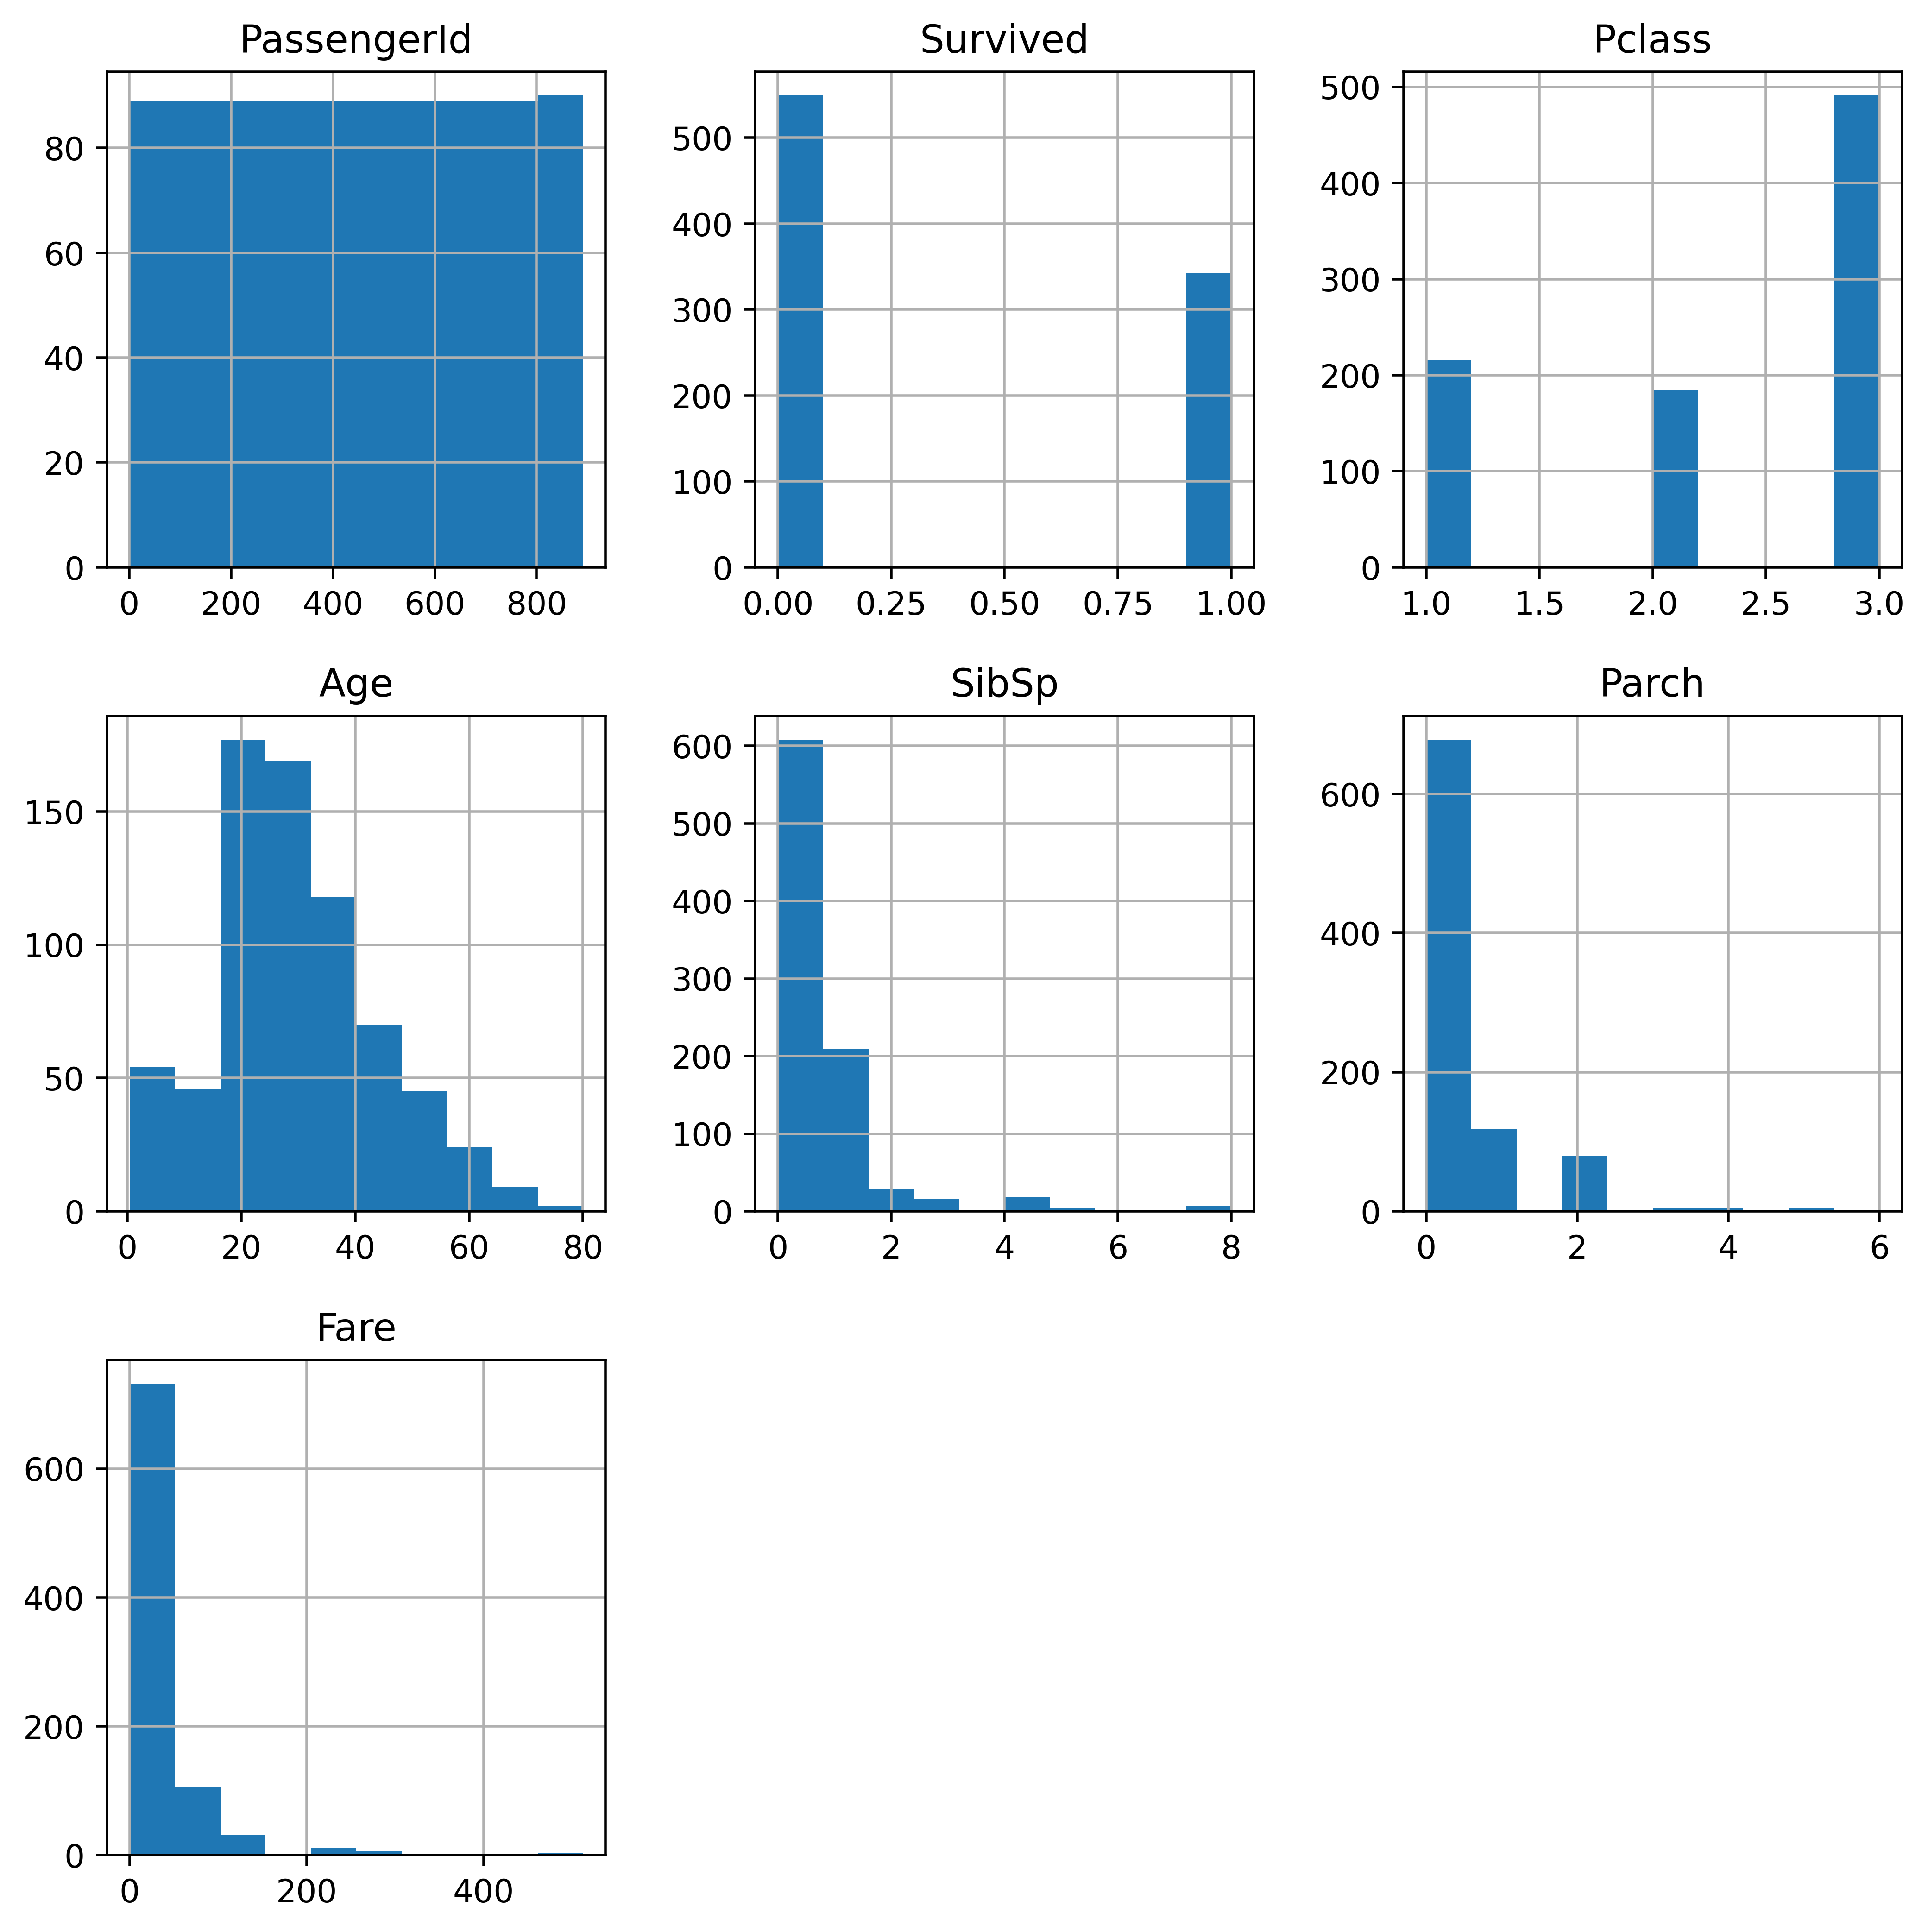

In [6]:
#Create visualizations such as histograms, box plots, or pair plots to visualize
#the distributions and relationships between features.
df.hist()

<Axes: >

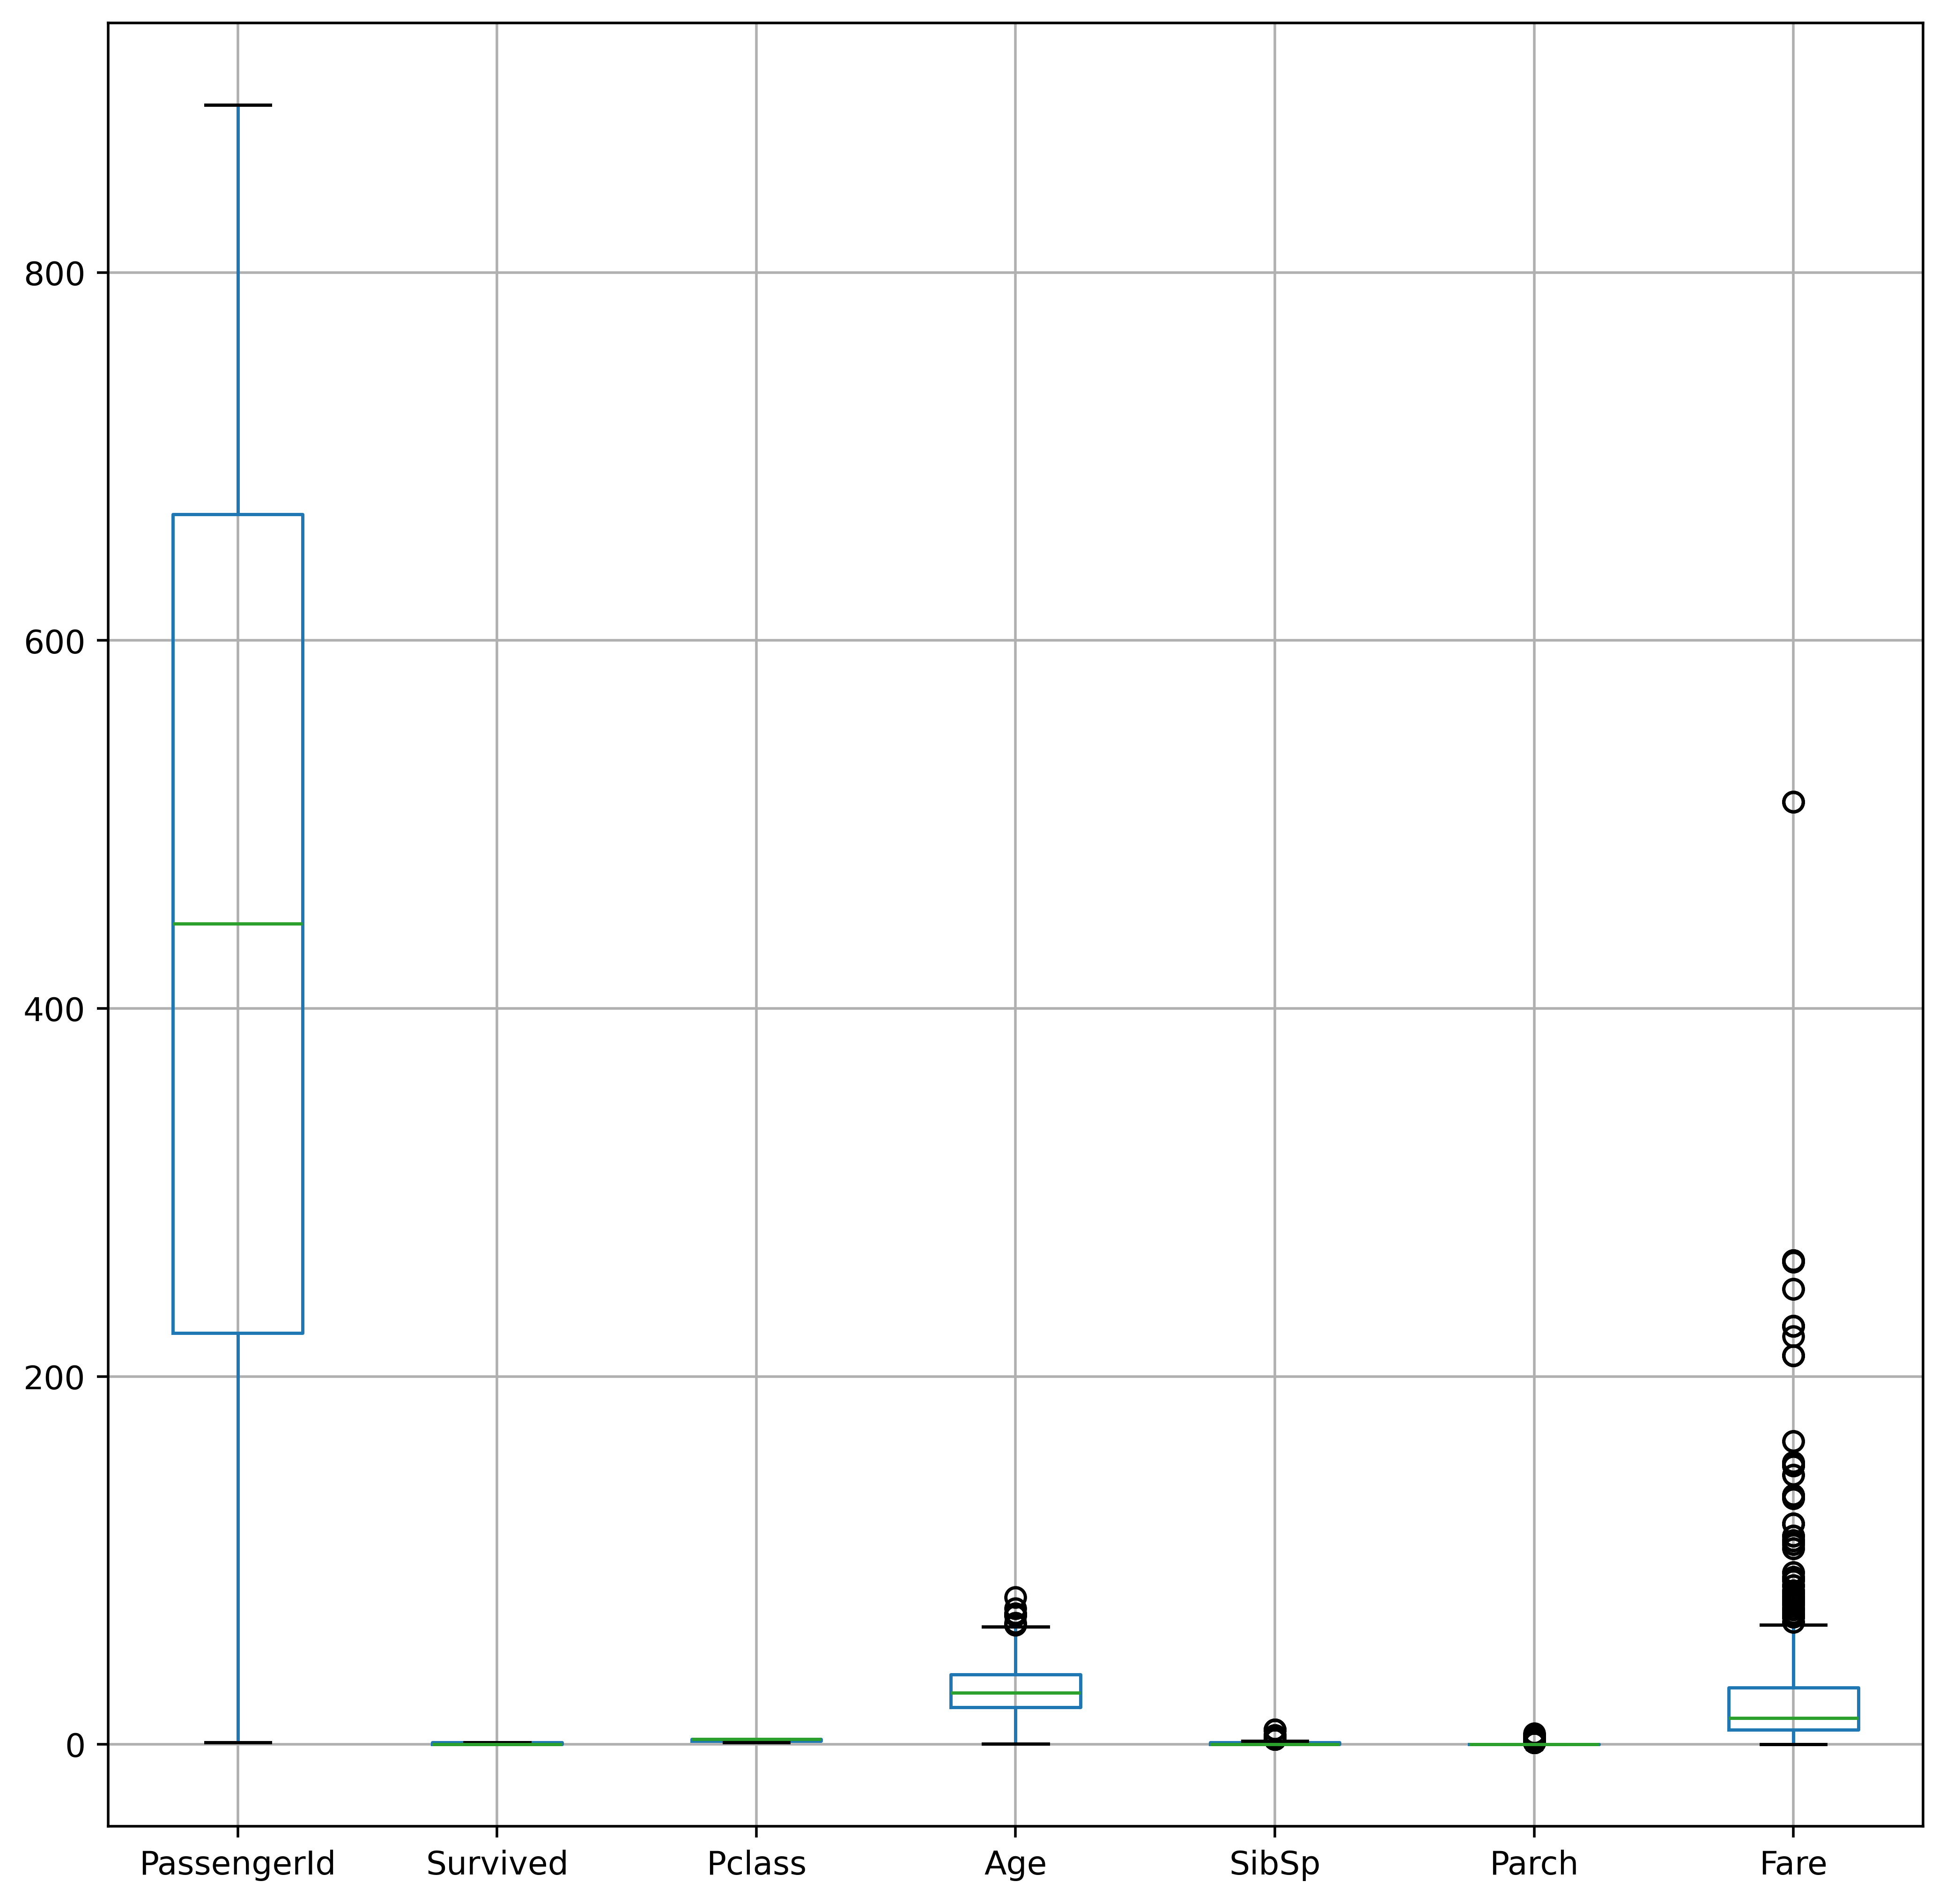

In [7]:
df.boxplot()

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

<Axes: >

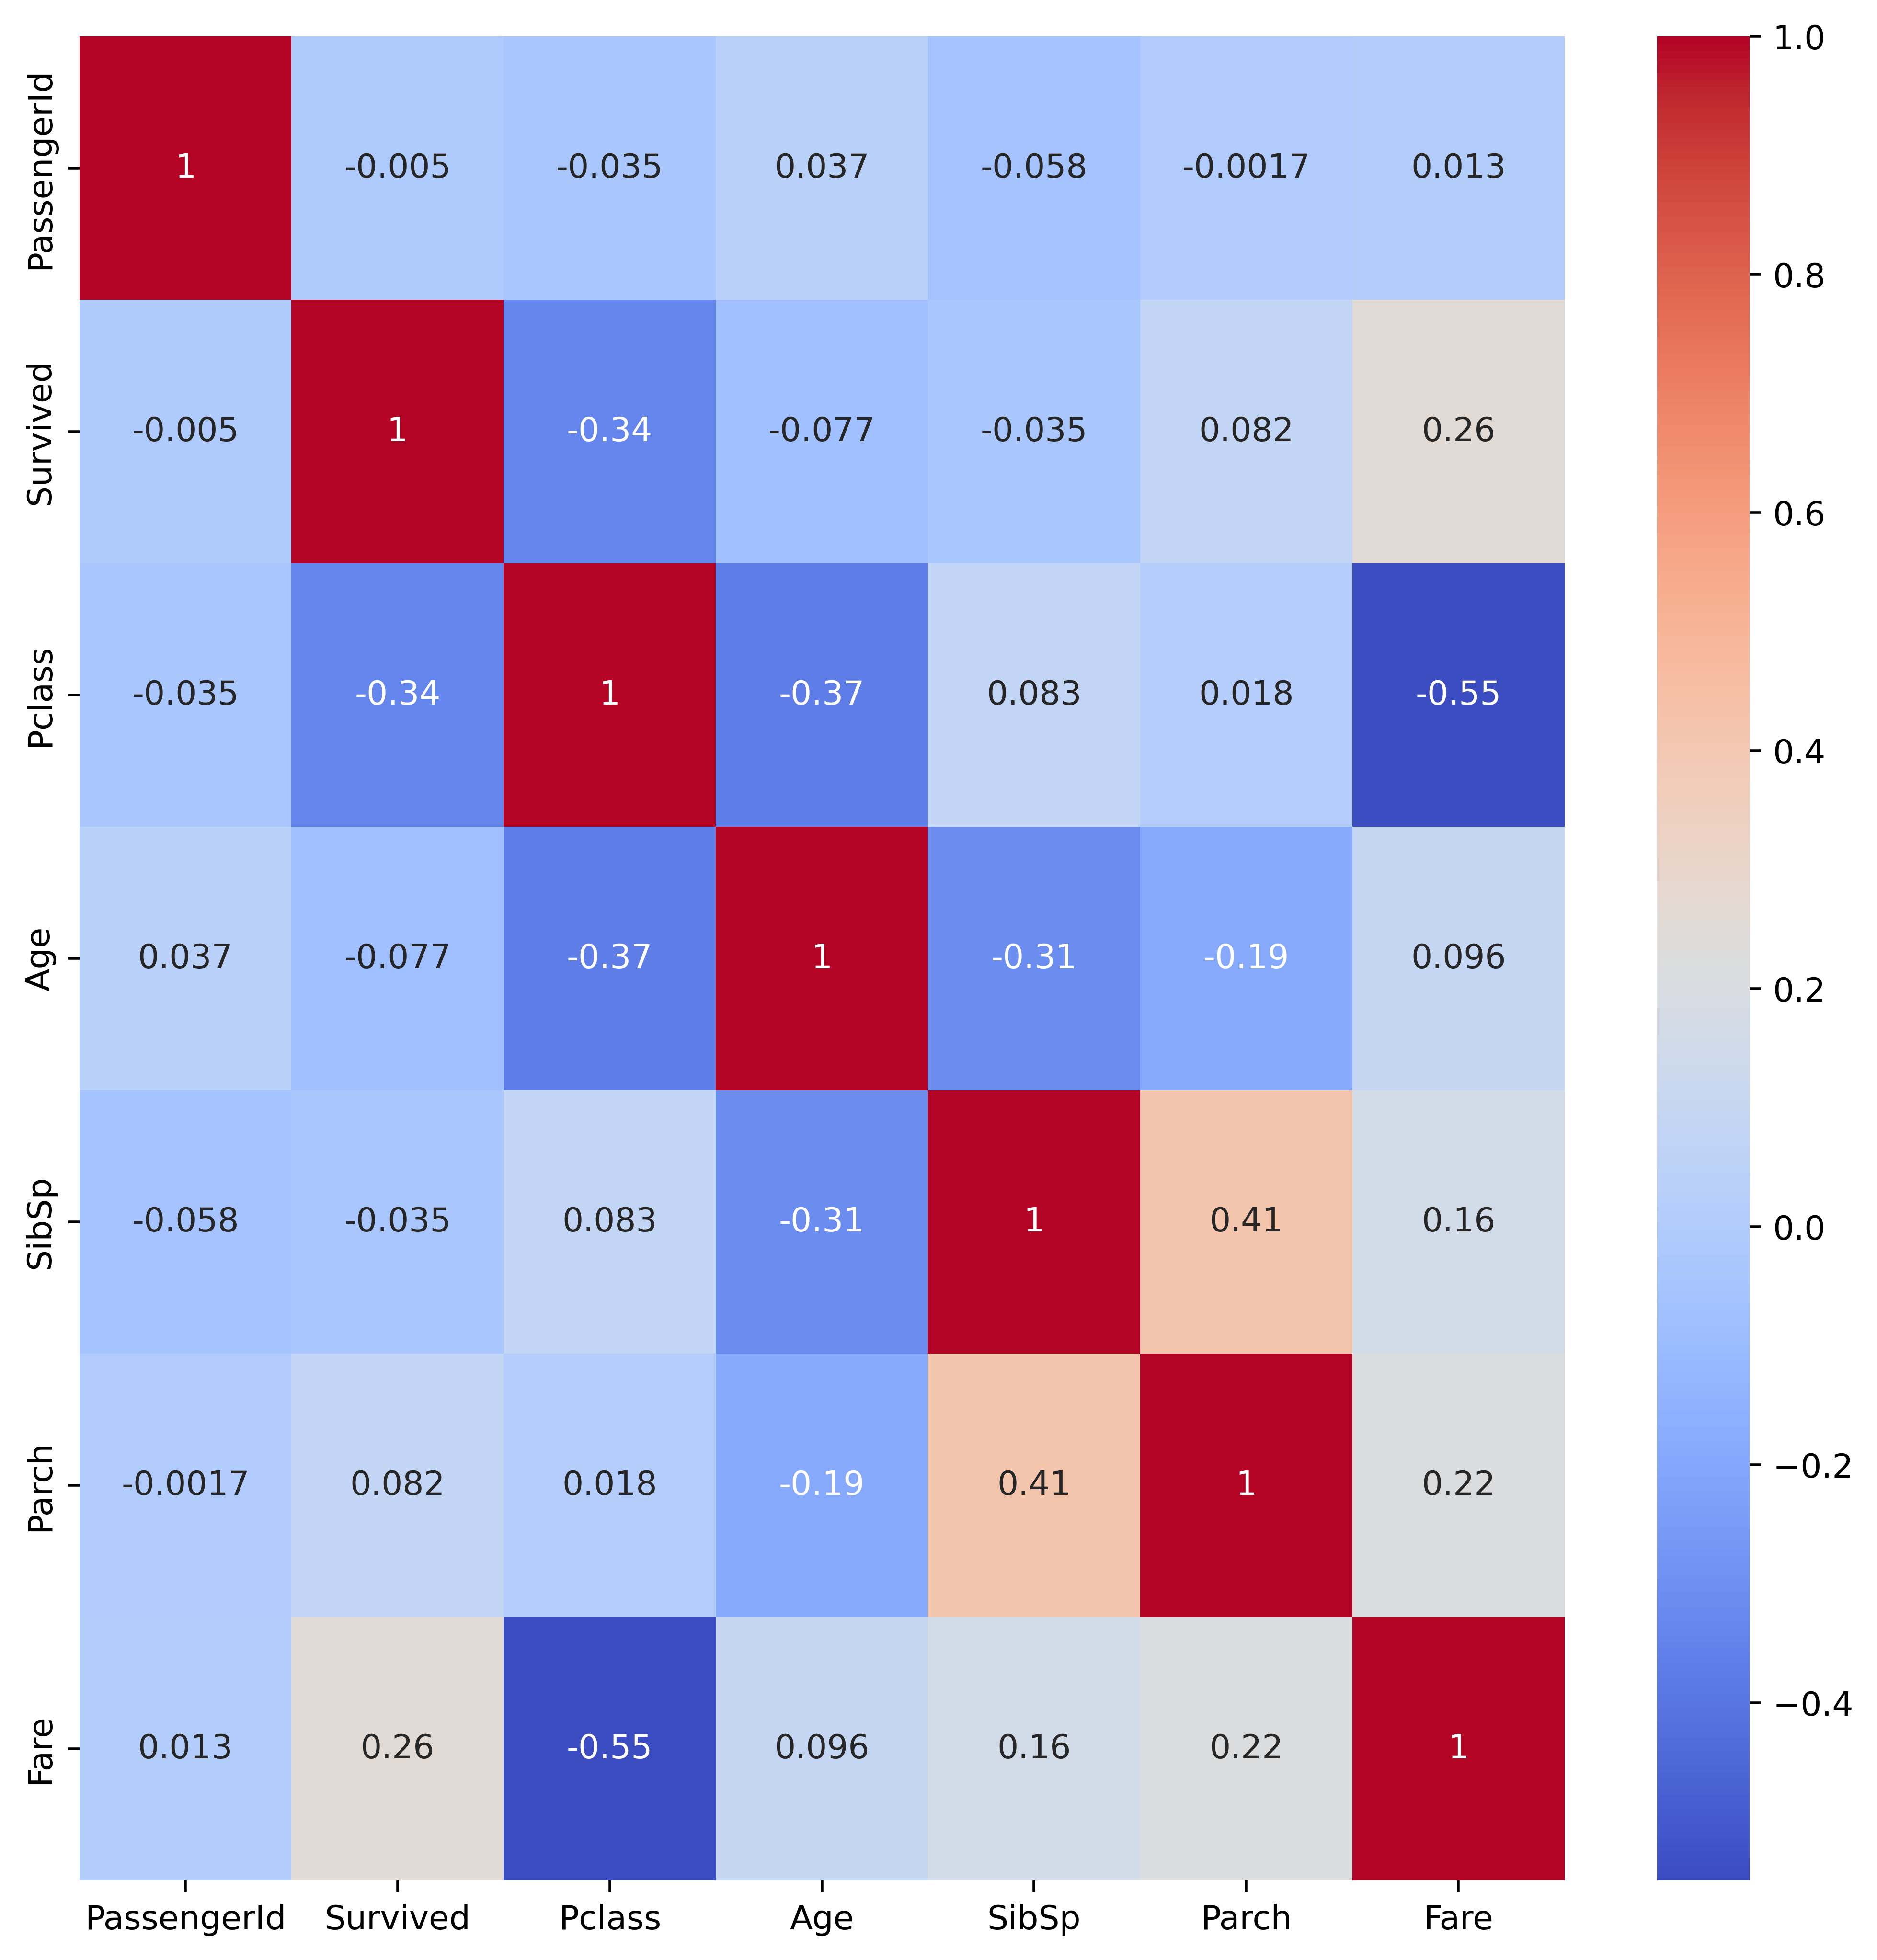

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [11]:
#Data Preprocessing:
#Handle missing values (e.g., imputation).
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
for i in df.isnull().sum():
    print((i/891)*100,'%')

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
19.865319865319865 %
0.0 %
0.0 %
0.0 %
0.0 %
77.10437710437711 %
0.22446689113355783 %


In [13]:
df['Age'].median()

28.0

In [14]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [15]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
#Encode categorical variables:
#we have to convert categorial data into numerical since machine learning doesn't understand categorial value
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) #here map() will replace each value 
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [18]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    0  27.0      0   
887                       Graham, Miss. Margaret Edith    1  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    1  28.0      1   
889                              Behr, Mr. Karl Howell    0  26.0      0   
890                                Dooley, Mr. Patrick    0  32.0      0   

     Parch            Ticket     Fare Cabin  Embarked  
0        0         A/5 21171   7.2500   NaN         0  
1        0          PC 17599  71.2833   C85         1  
2        0  STON/O2. 3101282   7.9250   NaN         0  
3        0            113803  53.1000  C123         0  
4        0            373450   8.0500   NaN         0  
..     ...               ...      ...   ...       ...  
886      0            211536  13.0000   NaN         0  
887      0            112053  30.0000   B42         0  
888      2        W./C. 6607  23.4500   NaN         0  
889      0            111369  30.0000  C148         1  
890      0            370376   7.7500   NaN         2  

[891 rows x 12 columns]

In [65]:
data = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = df[data]
y = df['Survived'].values
y.shape

(891,)

In [66]:
x

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
888       3    1  28.0      1      2  23.4500         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[891 rows x 7 columns]

In [71]:
#Split the data
train_test_split(x,y,train_size=0.8)

[     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 108       3    0  38.0      0      0   7.8958         0
 399       2    1  28.0      0      0  12.6500         0
 284       1    0  28.0      0      0  26.0000         0
 247       2    1  24.0      0      2  14.5000         0
 650       3    0  28.0      0      0   7.8958         0
 ..      ...  ...   ...    ...    ...      ...       ...
 793       1    0  28.0      0      0  30.6958         1
 771       3    0  48.0      0      0   7.8542         0
 464       3    0  28.0      0      0   8.0500         0
 170       1    0  61.0      0      0  33.5000         0
 146       3    0  27.0      0      0   7.7958         0
 
 [712 rows x 7 columns],
      Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 884       3    0  25.0      0      0   7.0500         0
 259       2    1  50.0      0      1  26.0000         0
 381       3    1   1.0      0      2  15.7417         1
 627       1    1  21.0      0      0  77.9583         0
 783

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [77]:
x_train

Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
331       1    0  45.5      0      0   28.5000         0
733       2    0  23.0      0      0   13.0000         0
382       3    0  32.0      0      0    7.9250         0
704       3    0  26.0      1      0    7.8542         0
813       3    1   6.0      4      2   31.2750         0
..      ...  ...   ...    ...    ...       ...       ...
106       3    1  21.0      0      0    7.6500         0
270       1    0  28.0      0      0   31.0000         0
860       3    0  41.0      2      0   14.1083         0
435       1    1  14.0      1      2  120.0000         0
102       1    0  21.0      0      1   77.2875         0

[712 rows x 7 columns]

In [78]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,

In [79]:
x_test

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
709       3    0  28.0      1      1  15.2458         1
439       2    0  31.0      0      0  10.5000         0
840       3    0  20.0      0      0   7.9250         0
720       2    1   6.0      0      1  33.0000         0
39        3    1  14.0      1      0  11.2417         1
..      ...  ...   ...    ...    ...      ...       ...
433       3    0  17.0      0      0   7.1250         0
773       3    0  28.0      0      0   7.2250         1
25        3    1  38.0      1      5  31.3875         0
84        2    1  17.0      0      0  10.5000         0
10        3    1   4.0      1      1  16.7000         0

[179 rows x 7 columns]

In [80]:
y_test

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [81]:
#creating the model
#we already import the library above
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [98]:
#evaluate the model
y_pred = LR.predict(x_test)
y_pred
y_pred_proba = LR.predict_proba(x_test)[:, 1]
y_pred_proba

array([0.09561856, 0.22265603, 0.13529584, 0.89064295, 0.7008152 ,
       0.93393444, 0.72198591, 0.08874188, 0.7889944 , 0.92608059,
       0.33593586, 0.07020061, 0.38544419, 0.12617978, 0.19872515,
       0.93959669, 0.30257461, 0.72203592, 0.24584887, 0.33737545,
       0.12168932, 0.41091991, 0.61369955, 0.13577505, 0.11132631,
       0.06930568, 0.42238079, 0.22402036, 0.08202594, 0.60157704,
       0.13887838, 0.66488005, 0.51521856, 0.62298055, 0.14261069,
       0.10574331, 0.46263604, 0.72198591, 0.93101861, 0.10928721,
       0.20170975, 0.07982065, 0.10933444, 0.16151274, 0.5372391 ,
       0.09832829, 0.13897718, 0.12543172, 0.12140519, 0.31893197,
       0.6796363 , 0.81866119, 0.04524296, 0.53763472, 0.05891067,
       0.93855889, 0.21744245, 0.93034974, 0.77947609, 0.77349389,
       0.13172707, 0.86320905, 0.7644628 , 0.45515586, 0.16151274,
       0.63674314, 0.32120048, 0.10635876, 0.12587392, 0.85435035,
       0.76024864, 0.94782254, 0.52982971, 0.89045803, 0.12495

In [99]:
#we a have already import all the required library above
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

In [100]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.80
Precision: 0.77
Recall: 0.73
F1-score: 0.75
ROC-AUC: 0.79


In [102]:
#calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.88


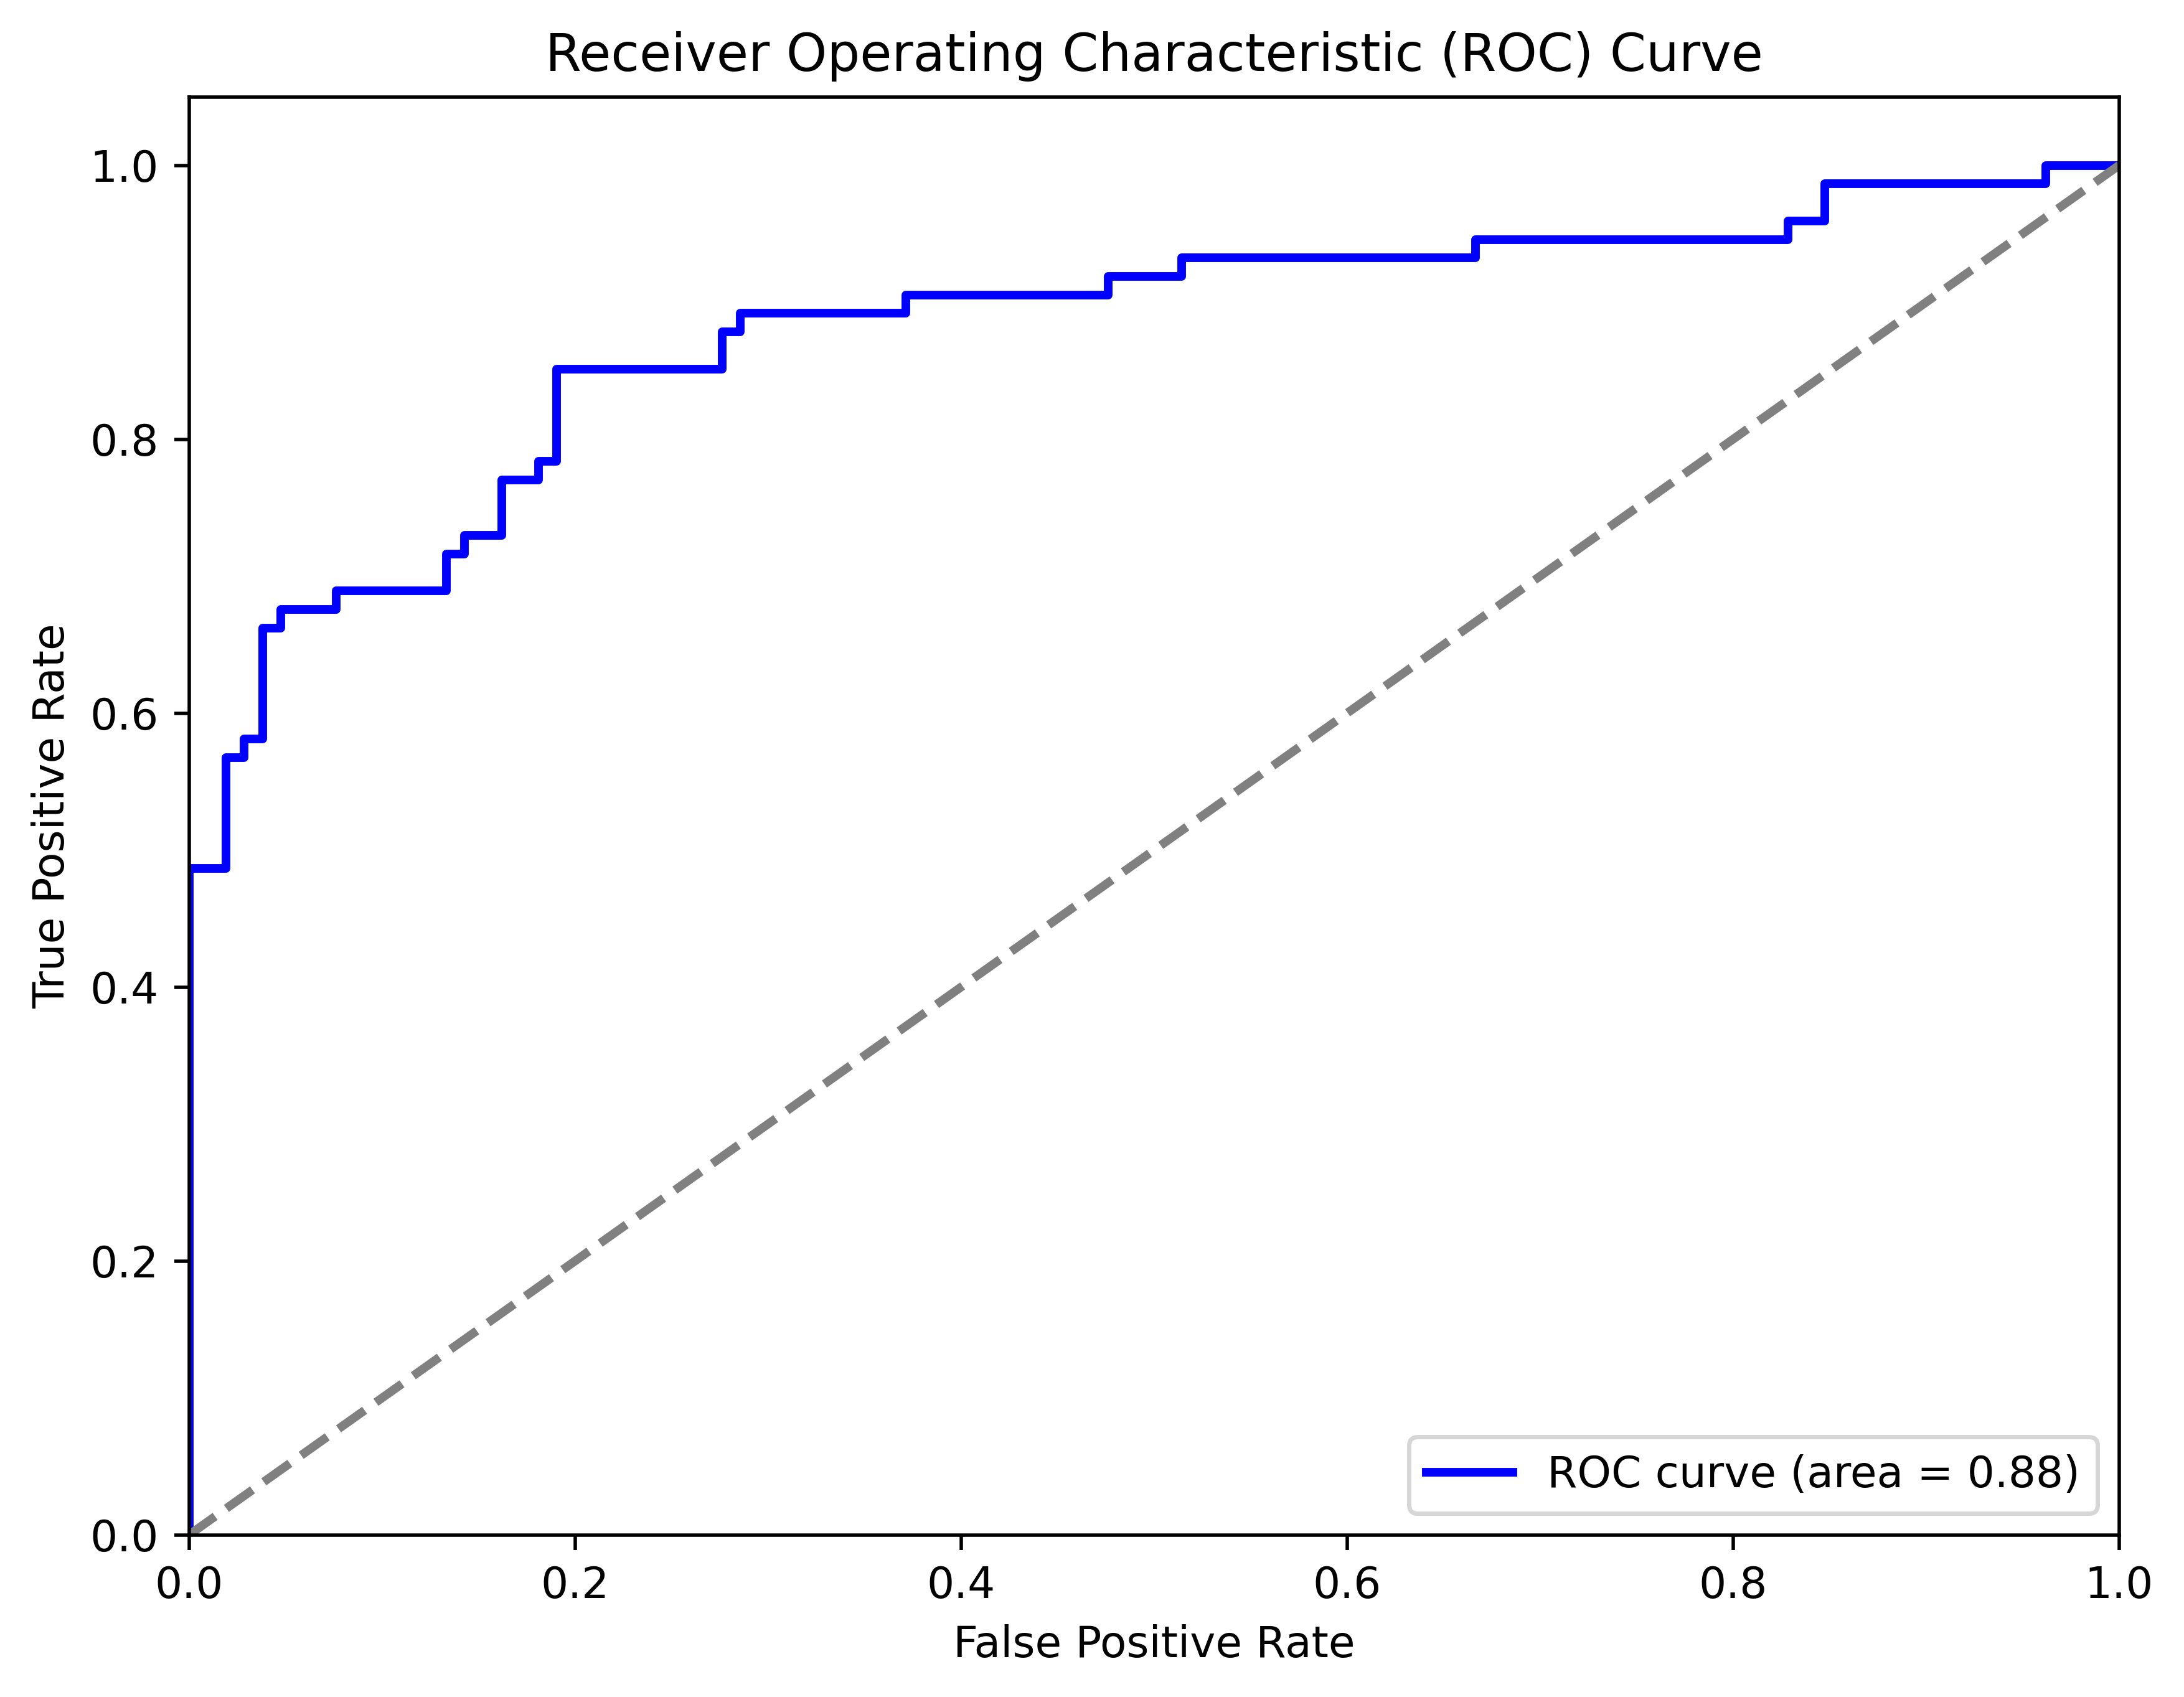

In [103]:
#Visualize the ROC curve
plt.figure(figsize=(8, 6)) #size of the graph
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')#fpr represents false +ve rate and tpr represents true +ve rate
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0]) #xlim is used to set the limits of the x-axis of a plot
plt.ylim([0.0, 1.05]) #ylim is used to set the limit of the y-axis of a plot
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

In [105]:
coefficients = pd.DataFrame(LR.coef_.T, index=data, columns=['Coefficient'])
print(coefficients)

          Coefficient
Pclass      -0.930730
Sex          2.601349
Age         -0.030378
SibSp       -0.313691
Parch       -0.084018
Fare         0.003146
Embarked     0.225743
